In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
df = pd.read_csv("Admdata.csv")

In [11]:
#to check for rows and columns of the given dataset
df.shape

(500, 9)

In [12]:
# to check for presence of any null-values
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [13]:
# statistical description of the dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# check first 5 rows
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [78]:
df1 = df 

In [69]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [79]:
def fun2(a):
    if(a>= 0.80):
        return 1
    else:
        return 0
    

In [80]:
df1['Chance of Admit'] = df1['Chance of Admit'].apply(fun2)

In [81]:
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [82]:
# no of admitted and non-admitted students
t1 = df1['Chance of Admit'].value_counts()
t1

0    345
1    155
Name: Chance of Admit, dtype: int64

([<matplotlib.axis.XTick at 0x180c0563400>,
 <a list of 2 Text xticklabel objects>)

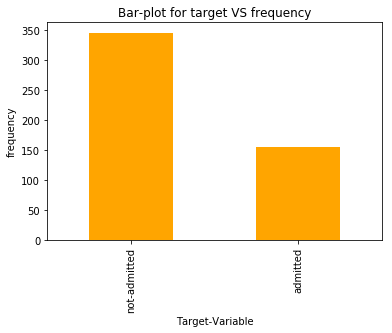

In [93]:
t1.plot.bar(color = 'orange')
plt.xlabel("Target-Variable")
plt.ylabel("frequency")
plt.title("Bar-plot for target VS frequency")
l1 = list(['not-admitted','admitted'])
plt.xticks([0,1],l1)

In [94]:
#dropping serial no
df1 = df1.drop("Serial No.", axis = 1)

In [95]:
df1.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1


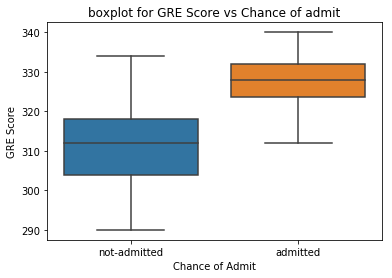

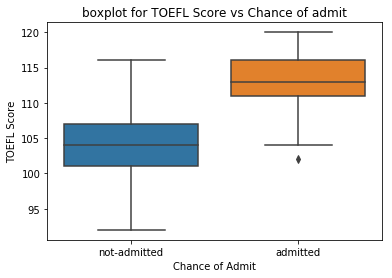

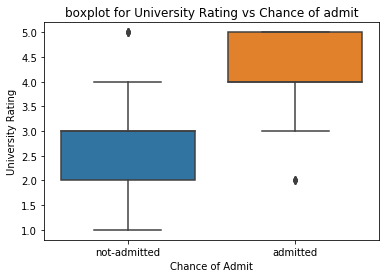

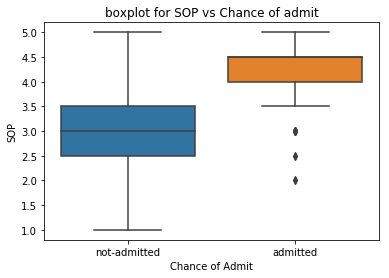

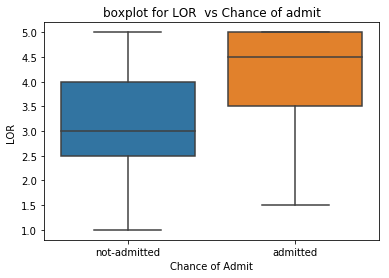

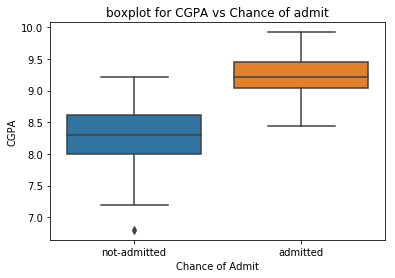

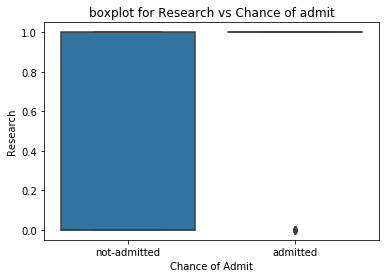

In [103]:
for i in df1.columns:
    if(i == 'Chance of Admit'):
        continue
    else:
        plt.title("boxplot for "+ i + " vs Chance of admit")
        sns.boxplot(x = "Chance of Admit",y = i ,data = df1)
        l1 = list(['not-admitted','admitted'])
        plt.xticks([0,1],l1)
        plt.show()
        

## inference
It is obvious that the higher the GRE score,TOFEL score, sop rating,cgpa,lor rating higher the no of students got admitted.

AxesSubplot(0.125,0.125;0.775x0.755)

University Rating   1    2    3   4   5
Chance of Admit                        
0                  34  119  139  43  10
1                   0    7   23  62  63


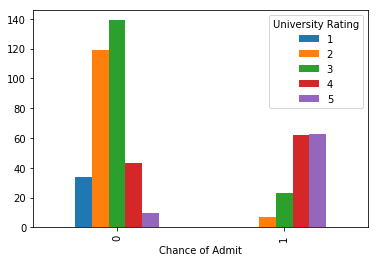

In [110]:
t=pd.crosstab(df1['Chance of Admit'],df['University Rating']).plot.bar()
print(t)
print()
t1 = pd.crosstab(df1['Chance of Admit'],df['University Rating'])
print(t1)

# inference
higher the university rating, the more is the rate of admission means that students prefer to join high rated universities than the lower rated ones


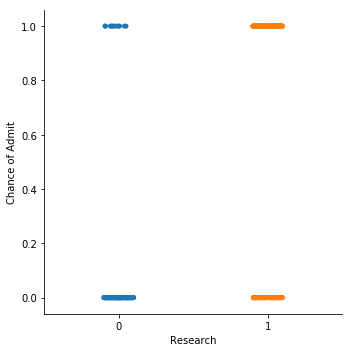

In [105]:
# catplot for research vs chance of admit
sns.catplot(x = 'Research',y = 'Chance of Admit', data = df1)

AxesSubplot(0.125,0.125;0.775x0.755)

Research           0    1
Chance of Admit          
0                209  136
1                 11  144


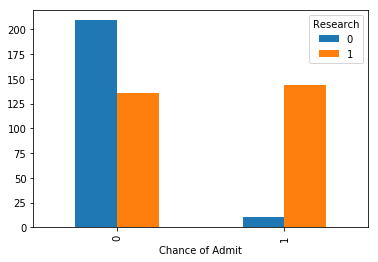

In [111]:
t=pd.crosstab(df1['Chance of Admit'],df['Research']).plot.bar()
print(t)
print()
t1 = pd.crosstab(df1['Chance of Admit'],df['Research'])
print(t1)

In [114]:
df1.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.683633
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.699101
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618279
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.581077
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.500391
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.742278
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.498311
Chance of Admit,0.683633,0.699101,0.618279,0.581077,0.500391,0.742278,0.498311,1.000000


### top 2 highly correlated features are
### CGPA and TOEFL SCORE

(array([ 1., 11., 34., 62., 80., 95., 73., 83., 38., 23.]),
 array([6.8  , 7.112, 7.424, 7.736, 8.048, 8.36 , 8.672, 8.984, 9.296,
        9.608, 9.92 ]),
 <a list of 1 Patch objects>)

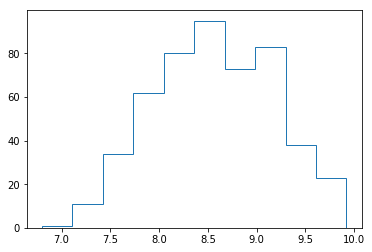

In [120]:
plt.hist(df1['CGPA'],histtype= 'step')

In [115]:
cgb = df1['CGPA'].max()
cga = df1['CGPA'].mean()
cgw = df1['CGPA'].min()

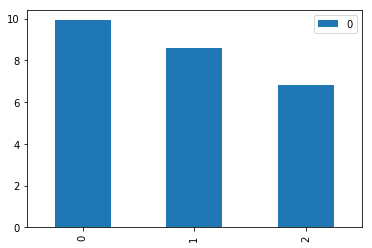

In [150]:
df3  = pd.DataFrame(data = [cgb,cga,cgw],index= [0,1,2])
df3.plot.bar()

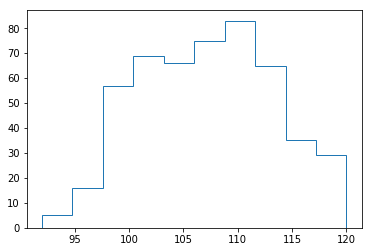

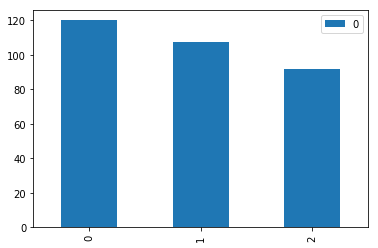

In [152]:
plt.hist(df1['TOEFL Score'],histtype= 'step')
cgb = df1['TOEFL Score'].max()
cga = df1['TOEFL Score'].mean()
cgw = df1['TOEFL Score'].min()
df3  = pd.DataFrame(data = [cgb,cga,cgw],index= [0,1,2])
df3.plot.bar()

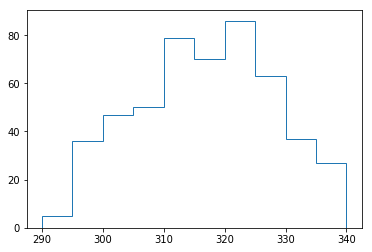

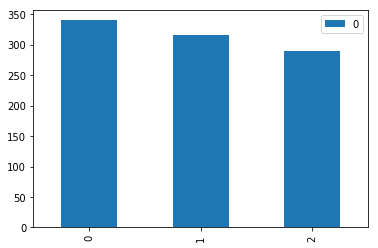

In [153]:
plt.hist(df1['GRE Score'],histtype= 'step')
cgb = df1['GRE Score'].max()
cga = df1['GRE Score'].mean()
cgw = df1['GRE Score'].min()
df3  = pd.DataFrame(data = [cgb,cga,cgw],index= [0,1,2])
df3.plot.bar()

In [130]:
y=df1["Chance of Admit"]
x=df1.drop('Chance of Admit',axis=1)

## Train and Test Split:

In [131]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

# logistic regression

In [132]:
# Modeling the data as logistic regression
# Train model
lr = LogisticRegression(solver = 'sag').fit(xtrain,ytrain)
#y prediction
ypred = lr.predict(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [133]:
#printing confusion matrix
cm = confusion_matrix(ytest,ypred)
print("confusion matrix \n",cm)
#checking accuracy and other metrics
print('Accuracy Score',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
t4 = accuracy_score(ytest,ypred)

confusion matrix 
 [[106   5]
 [ 18  21]]
Accuracy Score 0.8466666666666667
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.81      0.54      0.65        39

   micro avg       0.85      0.85      0.85       150
   macro avg       0.83      0.75      0.77       150
weighted avg       0.84      0.85      0.84       150



# decision tree

In [134]:
# fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 1).fit(xtrain,ytrain)
#y pred function
ypred = classifier.predict(xtest)
#printing confusion matrix
cm = confusion_matrix(ytest,ypred)
print("confusion matrix \n",cm)
#checking accuracy and other metrics
print('Accuracy Score',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
t5 = accuracy_score(ytest,ypred)

confusion matrix 
 [[101  10]
 [  4  35]]
Accuracy Score 0.9066666666666666
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       111
           1       0.78      0.90      0.83        39

   micro avg       0.91      0.91      0.91       150
   macro avg       0.87      0.90      0.88       150
weighted avg       0.91      0.91      0.91       150



# random forest

In [135]:
# fitting decision tree classification to the training set
clf = RandomForestClassifier(n_estimators=100,criterion = 'gini').fit(xtrain,ytrain)
#y pred function
ypred = clf.predict(xtest)
#printing confusion matrix
cm = confusion_matrix(ytest,ypred)
print("confusion matrix ",cm)
#checking accuracy and other metrics
print('Accuracy Score',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
t6 = accuracy_score(ytest,ypred)

confusion matrix  [[106   5]
 [  5  34]]
Accuracy Score 0.9333333333333333
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.87      0.87      0.87        39

   micro avg       0.93      0.93      0.93       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.93      0.93      0.93       150



## random forest has the best accuracy out of three models

       aslr      asdt      asrf
0  0.846667  0.906667  0.933333


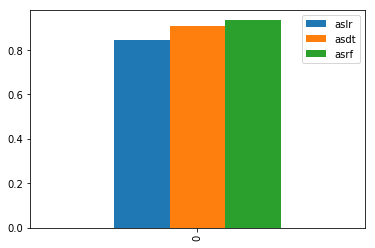

In [142]:

d = {'aslr': [t4], 'asdt': [t5],'asrf' : [t6]}
df2 = pd.DataFrame(data=d)
print(df2)

df2.plot.bar()



## Business Predictions:
### Students with high CGPA has higher chance of getting Placed.
### Students Prefer to join high rated universities.
### Good GRE scores also helps in getting admission easy.